<a href="https://colab.research.google.com/github/Namsik-Yoon/pytorch_basic/blob/master/5_2%20Non%20Linear%20%EC%98%88%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

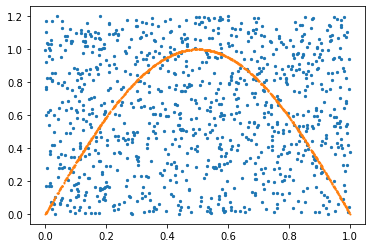

In [2]:
X = np.random.random((1000,2))
X[:,1] = X[:,1]*1.2

plt.scatter(X[:,0],X[:,1],s=5)
plt.scatter(X[:,0],np.sin(X[:,0]*np.pi),s=1)
plt.show()

In [3]:
y = []
for i in X:
    if i[1]<np.sin(i[0]*np.pi):y.append([1.])
    else:y.append([0.])
y = np.array(y)


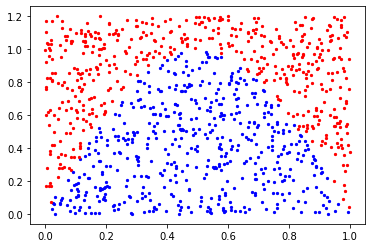

In [4]:
for i,x in enumerate(X):
    if y[i]==0:
        plt.scatter(*x,c='red',s=5)
    else:
        plt.scatter(*x,c='blue',s=5)
    

단층 퍼셉트론

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

In [6]:
class OneLayer(nn.Module):
    def __init__(self):
        super(OneLayer, self).__init__()
        self.layer = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer(x)
        out = self.sigmoid(out)
        return out

In [7]:
model1 = OneLayer()
criterion= nn.BCELoss()
optimizer = optim.Adam(model1.parameters(),lr=0.01)

In [8]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)
losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model1(X) # forwar 연산
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, loss.item()))

    losses.append(loss.item())

Epoch    0 Cost: 0.817053
Epoch 1000 Cost: 0.434612
Epoch 2000 Cost: 0.431902
Epoch 3000 Cost: 0.431898
Epoch 4000 Cost: 0.431898
Epoch 5000 Cost: 0.431898
Epoch 6000 Cost: 0.431898
Epoch 7000 Cost: 0.431898
Epoch 8000 Cost: 0.431898
Epoch 9000 Cost: 0.431898


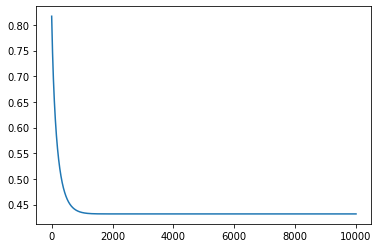

In [9]:
plt.plot(losses)
plt.show()

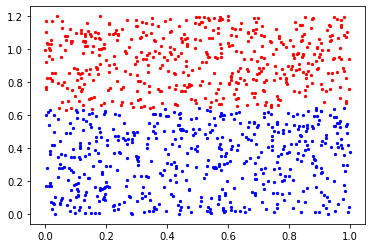

In [10]:
for i,x in enumerate(X):
    pred_y = model1(x)
    if pred_y<=0.5:
        plt.scatter(*x.detach(),c='red',s=5)
    else:
        plt.scatter(*x.detach(),c='blue',s=5)
    

다층 퍼셉트론

In [11]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.layer2 = nn.Linear(4,1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.sigmoid(out)
        return out

In [12]:
model2 = MLP()
criterion= nn.BCELoss()
optimizer = optim.Adam(model2.parameters(),lr=0.001)

In [13]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)
losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model2(X) # forwar 연산
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, loss.item()))

    losses.append(loss.item())

Epoch    0 Cost: 0.730433
Epoch 1000 Cost: 0.481508
Epoch 2000 Cost: 0.432104
Epoch 3000 Cost: 0.431900
Epoch 4000 Cost: 0.431884
Epoch 5000 Cost: 0.431863
Epoch 6000 Cost: 0.339128
Epoch 7000 Cost: 0.185202
Epoch 8000 Cost: 0.135177
Epoch 9000 Cost: 0.106762


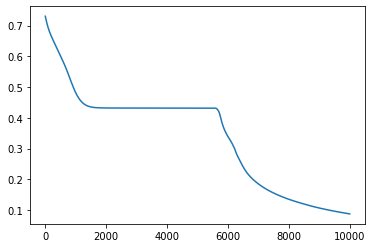

In [14]:
plt.plot(losses)
plt.show()

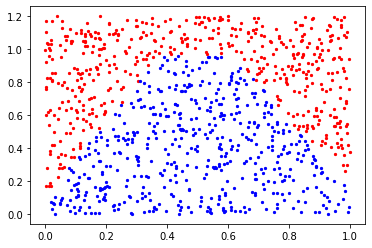

In [15]:
for i,x in enumerate(X):
    pred_y = model2(x)
    if pred_y<=0.5:
        plt.scatter(*x.detach(),c='red',s=5)
    else:
        plt.scatter(*x.detach(),c='blue',s=5)
    

XOR문제

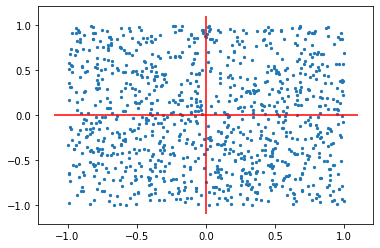

In [16]:
X = np.random.uniform(-1,1,size=(1000,2))

plt.scatter(X[:,0],X[:,1],s=5)
plt.vlines(0, -1.1, 1.1, color='r')
plt.hlines(0, -1.1, 1.1, color='r')
plt.show()

In [17]:
y = []
for i in X:
    if i[0]*i[1]<0:y.append([1.])
    else:y.append([0.])
y = np.array(y)


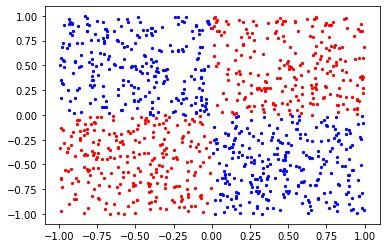

In [18]:
for i,x in enumerate(X):
    if y[i]==0:
        plt.scatter(*x,c='red',s=5)
    else:
        plt.scatter(*x,c='blue',s=5)

In [19]:
model3 = OneLayer()
criterion= nn.BCELoss()
optimizer = optim.Adam(model3.parameters(),lr=0.01)

In [20]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)
losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model3(X) # forwar 연산
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, loss.item()))

    losses.append(loss.item())

Epoch    0 Cost: 0.695888
Epoch 1000 Cost: 0.692186
Epoch 2000 Cost: 0.692186
Epoch 3000 Cost: 0.692186
Epoch 4000 Cost: 0.692186
Epoch 5000 Cost: 0.692186
Epoch 6000 Cost: 0.692186
Epoch 7000 Cost: 0.692186
Epoch 8000 Cost: 0.692186
Epoch 9000 Cost: 0.692186


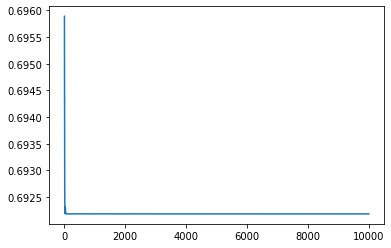

In [21]:
plt.plot(losses)
plt.show()

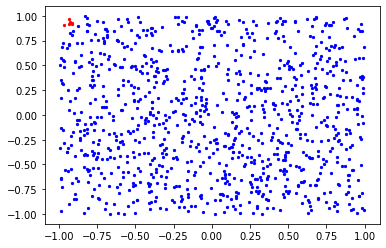

In [22]:
for i,x in enumerate(X):
    pred_y = model3(x)
    if pred_y<=0.5:
        plt.scatter(*x.detach(),c='red',s=5)
    else:
        plt.scatter(*x.detach(),c='blue',s=5)


In [23]:
model4 = MLP()
criterion= nn.BCELoss()
optimizer = optim.Adam(model4.parameters(),lr=0.01)

In [24]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)
losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model4(X) # forwar 연산
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, loss.item()))

    losses.append(loss.item())

Epoch    0 Cost: 0.741883
Epoch 1000 Cost: 0.340707
Epoch 2000 Cost: 0.339526
Epoch 3000 Cost: 0.339306
Epoch 4000 Cost: 0.339229
Epoch 5000 Cost: 0.339189
Epoch 6000 Cost: 0.339172
Epoch 7000 Cost: 0.339165
Epoch 8000 Cost: 0.339166
Epoch 9000 Cost: 0.339159


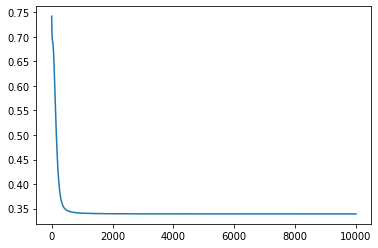

In [25]:
plt.plot(losses)
plt.show()

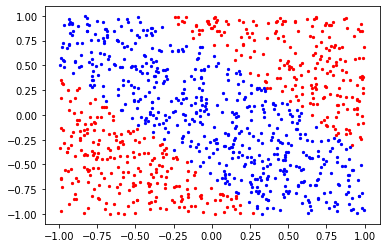

In [26]:
for i,x in enumerate(X):
    pred_y = model4(x)
    if pred_y<=0.5:
        plt.scatter(*x.detach(),c='red',s=5)
    else:
        plt.scatter(*x.detach(),c='blue',s=5)


In [30]:
class MLP2(nn.Module):
    def __init__(self):
        super(MLP2, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
            )
    def forward(self, x):
        out = self.model(x)
        return out

In [33]:
model5 = MLP2()
criterion= nn.BCELoss()
optimizer = optim.Adam(model5.parameters(),lr=0.001)

In [34]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)
losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model5(X) # forwar 연산
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, loss.item()))

    losses.append(loss.item())

Epoch    0 Cost: 0.735467
Epoch 1000 Cost: 0.089588
Epoch 2000 Cost: 0.031978
Epoch 3000 Cost: 0.016805
Epoch 4000 Cost: 0.010008
Epoch 5000 Cost: 0.006244
Epoch 6000 Cost: 0.004088
Epoch 7000 Cost: 0.002853
Epoch 8000 Cost: 0.002117
Epoch 9000 Cost: 0.001650


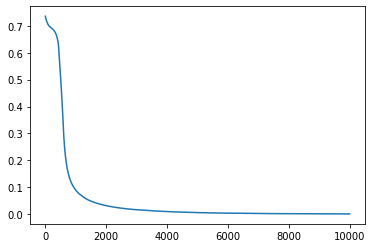

In [35]:
plt.plot(losses)
plt.show()

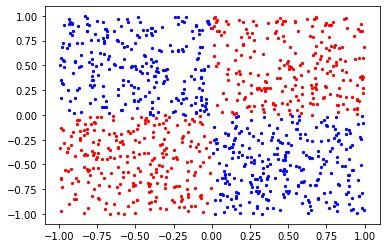

In [37]:
for i,x in enumerate(X):
    pred_y = model5(x)
    if pred_y<=0.5:
        plt.scatter(*x.detach(),c='red',s=5)
    else:
        plt.scatter(*x.detach(),c='blue',s=5)
